In [1]:
from pystan import StanModel
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
%matplotlib inline

In [2]:
np.random.seed(888888)

In [3]:
x = np.random.normal(0,1,50)

In [4]:
stancode = """
data {
  int<lower=0> N;
  real obs[N];
}
parameters {
  real mu;
}
model {
  mu ~ normal(0, 0.5);
  obs ~ normal(mu, 1);
}
"""

In [14]:
%%time
m = StanModel(model_code=stancode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c55bfd20e2bb4677545e7db416473d3a NOW.


CPU times: user 4.03 s, sys: 656 ms, total: 4.69 s
Wall time: 2min 16s


In [6]:
%%time
fit = m.sampling(
    {'N': 50,'obs': x,},
    n_jobs=4,
    chains=4,
    iter=20000,
)

CPU times: user 109 ms, sys: 672 ms, total: 781 ms
Wall time: 1.59 s


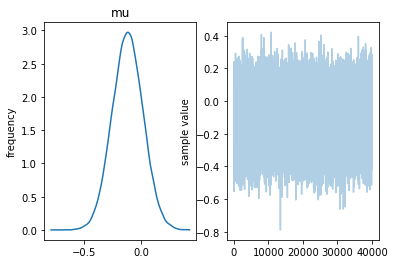

In [7]:
figure = fit.traceplot()

In [15]:
samples = fit.extract()
samples

OrderedDict([('mu',
              array([  5.39387053e-02,  -6.91048514e-02,  -1.24372820e-01, ...,
                      -2.42234858e-04,  -3.45815247e-01,  -1.77362097e-01])),
             ('lp__',
              array([-25.89002546, -25.14851243, -25.08152678, ..., -25.46276986,
                     -26.46757141, -25.1721877 ]))])

In [16]:
fit

Inference for Stan model: anon_model_c55bfd20e2bb4677545e7db416473d3a.
4 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=40000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu    -0.12  1.1e-3   0.13  -0.38  -0.21  -0.12  -0.03   0.15  14469    1.0
lp__ -25.57  5.2e-3   0.69 -27.52 -25.72  -25.3 -25.13 -25.08  17881    1.0

Samples were drawn using NUTS at Tue Sep  5 22:02:42 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

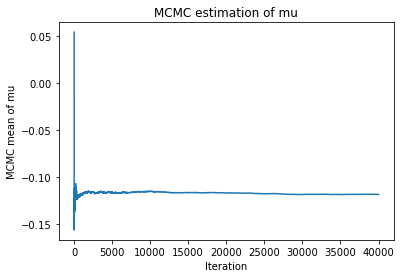

In [13]:
# plot the estimate for the mean of mu, cumulating mean
fig, ax = plt.subplots()
mu_samples = samples['mu']
m_mu_samples = [np.mean(mu_samples[:i]) for i in np.arange(1, len(mu_samples))]
ax.plot(m_mu_samples)
ax.set_xlabel('Iteration')
ax.set_ylabel('MCMC mean of mu')
ax.set_title('MCMC estimation of mu')

In [ ]:
stancode = """
data {
  int<lower=0> N;
  real obs[N];
}
parameters {
  real mu;
  real<lower=0> std;
}
model {
  mu ~ cauchy(0, 10);
  std ~ cauchy(0, 10);
  obs ~ normal(mu, std);
}
"""